# Guia 2.2

# Ejercicio 3

Considere dos sistemas LTI conectados en cascada (Figura 2), con respuestas al impulso dadas por $h_A[n] = sin(8n)$ y $h_B[n] = a^n$, donde $a \in \mathbb{R}$, $|a| < 1$ y $0 \leq n \leq N-1$ con $N$ el número de muestras distintas de cero. Obtenga N muestras de las respuestas al impulso, $h_A$ y $h_B$, según las definiciones dadas, y determine la salida $y[n]$ para una entrada $x[n] = \delta [n] - a\delta [n-1]$, siendo $\delta [n]$ es la función de impulso unitario. Luego invierta el orden de conexión de los sistemas y vuelva a calcular la salida. Compare con la salida obtenida originalmente.

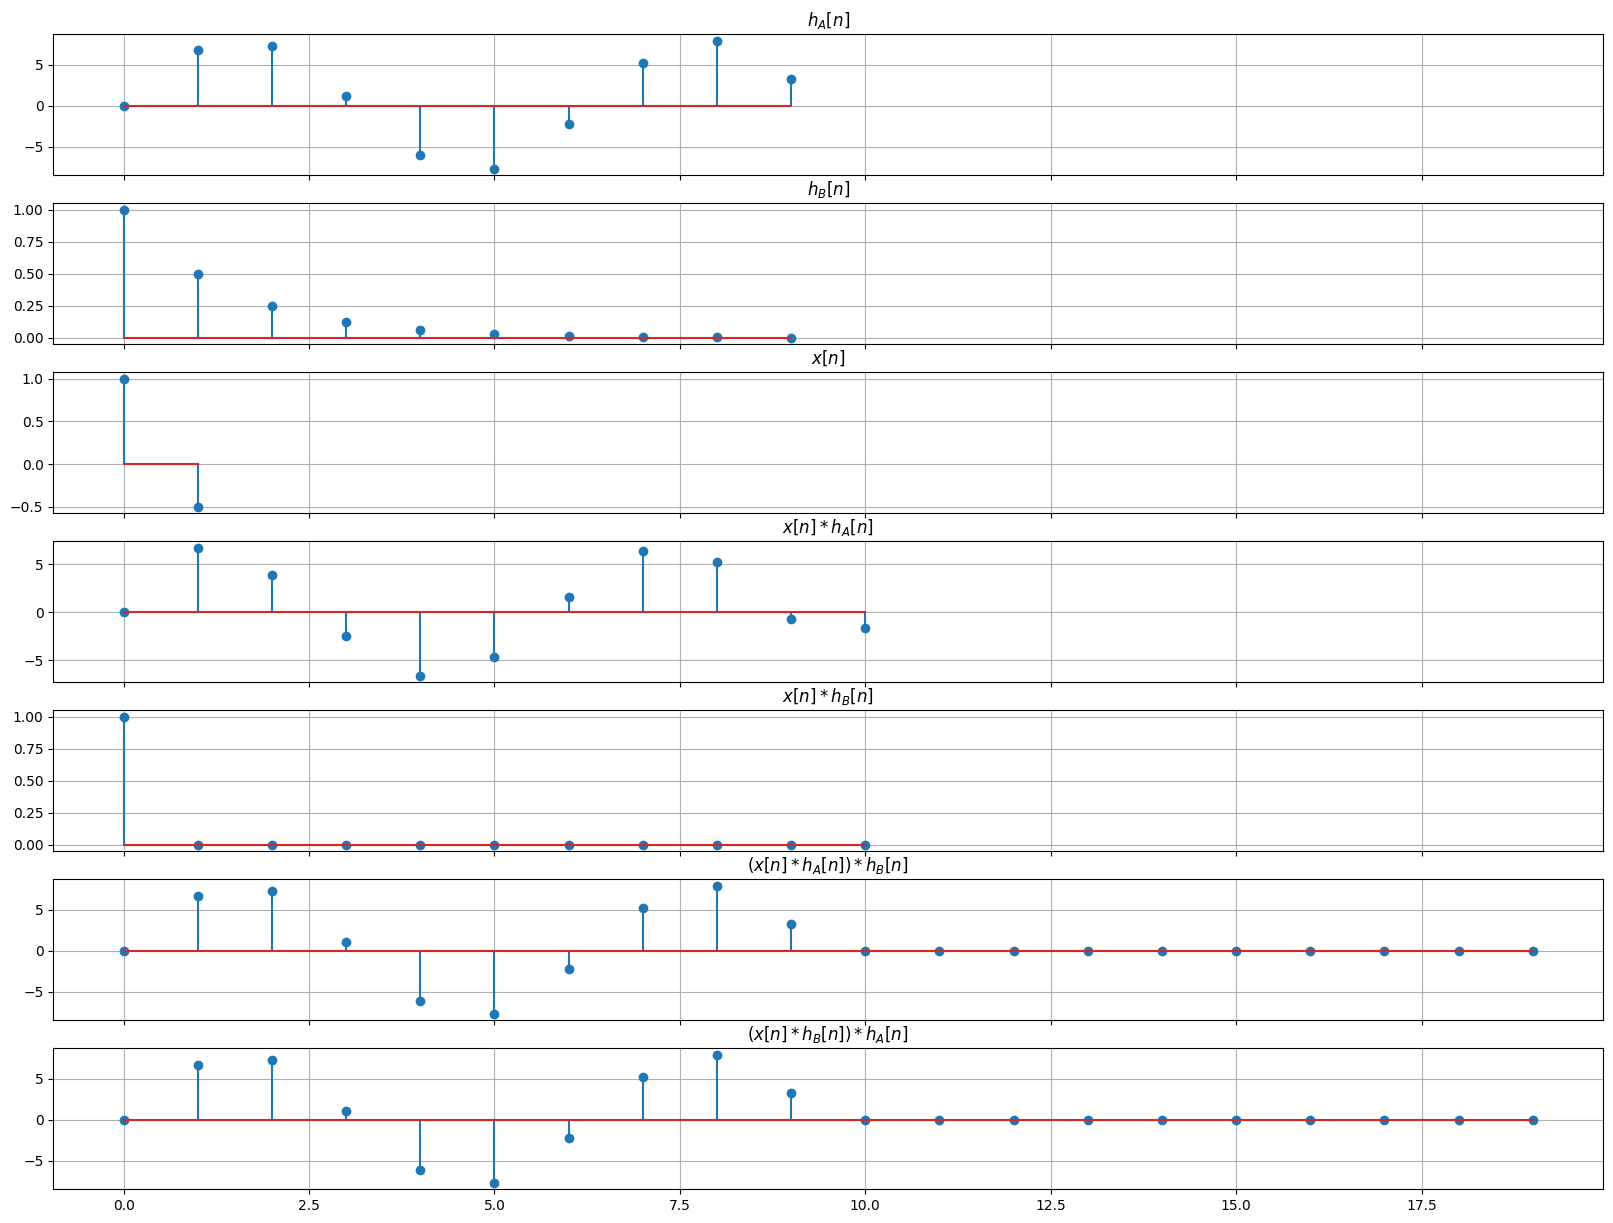

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.5

def impulso(n):
    return np.equal(n,[0]*len(n))

def convolucion(x,h):
    N = len(x)
    M = len(h)
    y = [0]*(N+M-1)
    for n in range(N):
        for k in range(M):
            y[n+k] += x[n]*h[k]
    return y

def hA(n):
    return 8*np.sin(n)

def hB(n):
    return np.power([a]*len(n), n)

# test
N = 10
n = [i for i in range(N)]
ha = hA(n)
hb = hB(n)
x = [1,-a] # entrada d[n]-ad[n-1]

fig, ax = plt.subplots(7,sharex=True)
fig.set_figheight(15)
fig.set_figwidth(20)

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()
ax[6].grid()

ax[0].set_title('$h_A[n]$')
ax[0].stem(ha)
ax[1].set_title('$h_B[n]$')
ax[1].stem(hb)
ax[2].set_title('$x[n]$')
ax[2].stem(x)
ax[3].set_title('$x[n]*h_A[n]$')
ax[3].stem(convolucion(x,ha))
ax[4].set_title('$x[n]*h_B[n]$')
ax[4].stem(convolucion(x,hb))
ax[5].set_title('$(x[n]*h_A[n])*h_B[n]$')
ax[5].stem(convolucion(convolucion(x,ha),hb))
ax[6].set_title('$(x[n]*h_B[n])*h_A[n]$')
ax[6].stem(convolucion(convolucion(x,hb),ha))

plt.show()